In [3]:
#IMPORTING MODULES 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [4]:
# LOADING OF TRAIN AND TEST DATASET

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
# View trian dataset head
train.head(2)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no


In [6]:
# View test dataset head
test.head(2)

,id,churn_prediction,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,NaN,KS,128,area_code_415,no,yes,25,265.1,110,...,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1
1,2,NaN,AL,118,area_code_510,yes,no,0,223.4,98,...,220.6,101,18.75,203.9,118,9.18,6.3,6,1.7,0


In [7]:
test.drop(['churn_prediction'],axis=1 ,inplace=True)

In [8]:

                                        # EXPLORATORY DATA ANALYSIS


In [9]:
# Checking the dimensionality of the train and test dataset:
print('Number of rows and columns for train dataset is:',train.shape, test.shape)
# Information on train dataset- columns datatypes and count of null values:
train.info()

Number of rows and columns for train dataset is: (4250, 20) (750, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 no

In [10]:
# Check for any dublicates

train.duplicated().value_counts()

False    4250
dtype: int64

In [11]:
# Check for categorical variables

train_cat = train.select_dtypes(exclude=['number','bool_','float_'])
train_cat.head()

,state,area_code,international_plan,voice_mail_plan,churn
0,OH,area_code_415,no,yes,no
1,NJ,area_code_415,no,no,no
2,OH,area_code_408,yes,no,no
3,OK,area_code_415,yes,no,no
4,MA,area_code_510,no,yes,no


In [12]:
# Summary Statistics for Numerical features

stats_num = train.describe()
stats_num.round().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.0,40.0,1.0,73.0,100.0,127.0,243.0
number_vmail_messages,4250.0,8.0,13.0,0.0,0.0,0.0,16.0,52.0
total_day_minutes,4250.0,180.0,54.0,0.0,143.0,180.0,216.0,352.0
total_day_calls,4250.0,100.0,20.0,0.0,87.0,100.0,113.0,165.0
total_day_charge,4250.0,31.0,9.0,0.0,24.0,31.0,37.0,60.0
total_eve_minutes,4250.0,200.0,50.0,0.0,166.0,201.0,234.0,359.0
total_eve_calls,4250.0,100.0,20.0,0.0,87.0,100.0,114.0,170.0
total_eve_charge,4250.0,17.0,4.0,0.0,14.0,17.0,20.0,31.0
total_night_minutes,4250.0,201.0,50.0,0.0,167.0,200.0,235.0,395.0
total_night_calls,4250.0,100.0,20.0,0.0,86.0,100.0,113.0,175.0


In [13]:
# Find percentage(%) value count for churn's as our target variable
print(train['churn'].value_counts())

train['churn'].value_counts()/len(train['churn'])*100

no     3652
yes     598
Name: churn, dtype: int64


no     85.929412
yes    14.070588
Name: churn, dtype: float64

In [14]:
# As easily understood that, we have an imbalanced data.

# 14.07 % of customers, who represent 598 people out of 4250, didn't show loyalty to the company and got churned while 85.93 % of which representing 3652 people out of 4250 showed loyalty to the company.

In [15]:
       
                                                    # VISUALIZATION
    

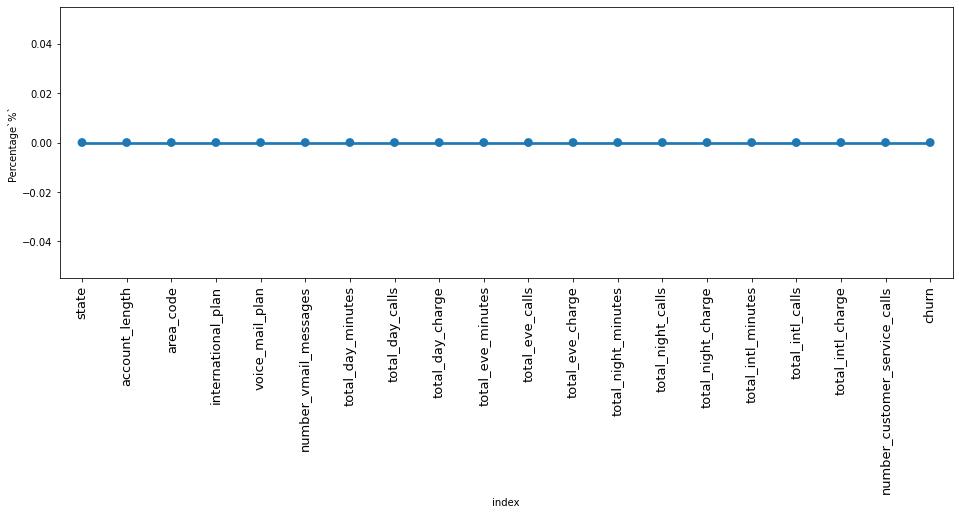

In [16]:
# MISSING VALUES

# Line Graph

missing = pd.DataFrame((train.isnull().sum())*100/train.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation = 90,fontsize =13)
#plt.title("Fig 1. Percentage of Missing Values",fontsize =16)
plt.ylabel("Percentage`%`")
plt.show()

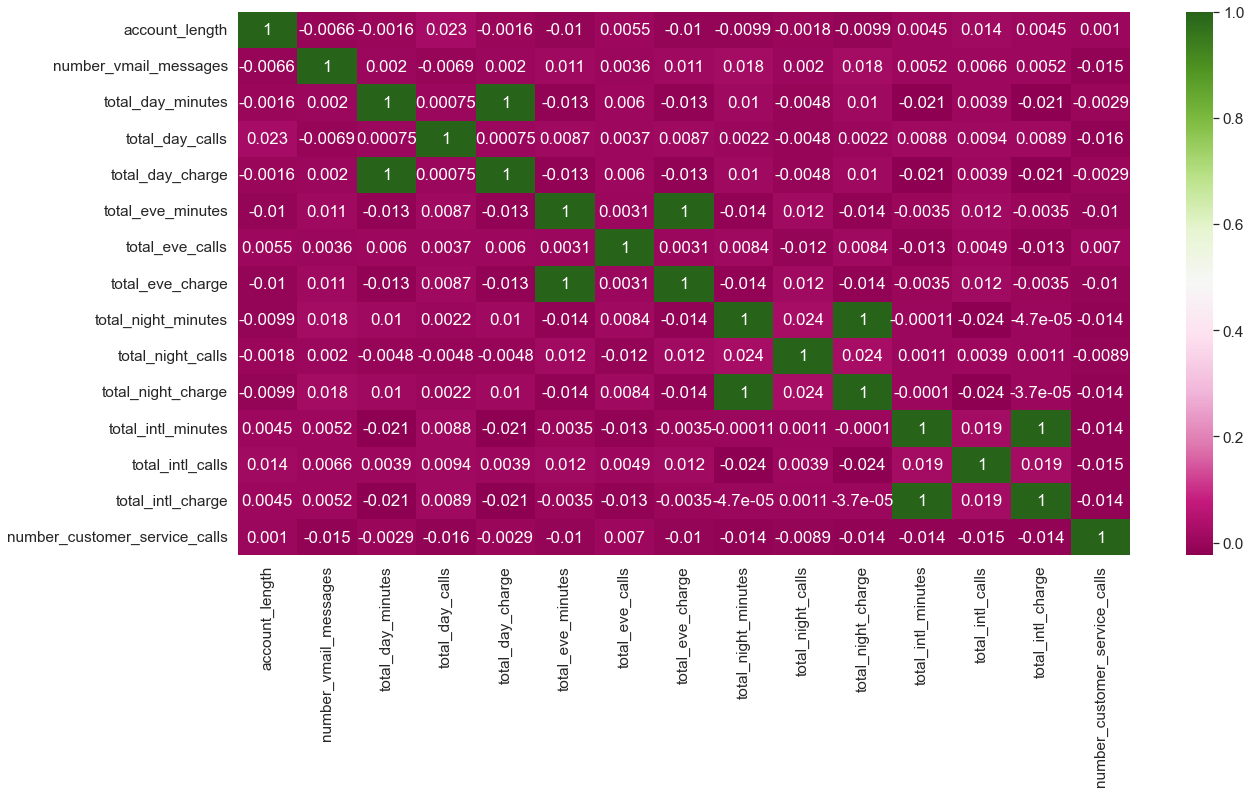

In [17]:
# HEATMAP - TO ANALYSE THE CORRELATION BETWEEN NUMERICAL FEATURES

sns.set(font_scale=1.4)
plt.figure(figsize=(20,10))
corr = train.corr()
sns.heatmap(corr, cmap='PiYG',annot=True)
plt.show()


In [18]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
high_corr = [column for column in upper.columns if any(upper[column] > 0.95)]
print(high_corr)

['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']


In [19]:
# Drop highly correlated features 
train.drop(high_corr, axis=1, inplace=True)


In [20]:
# drop same columns from test dataset
test.drop(['state','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_vmail_messages'], axis=1, inplace=True)

In [21]:
                                            
                
                                            #UNIVARIATE VISUALIZATION
                                                # train dataset
            

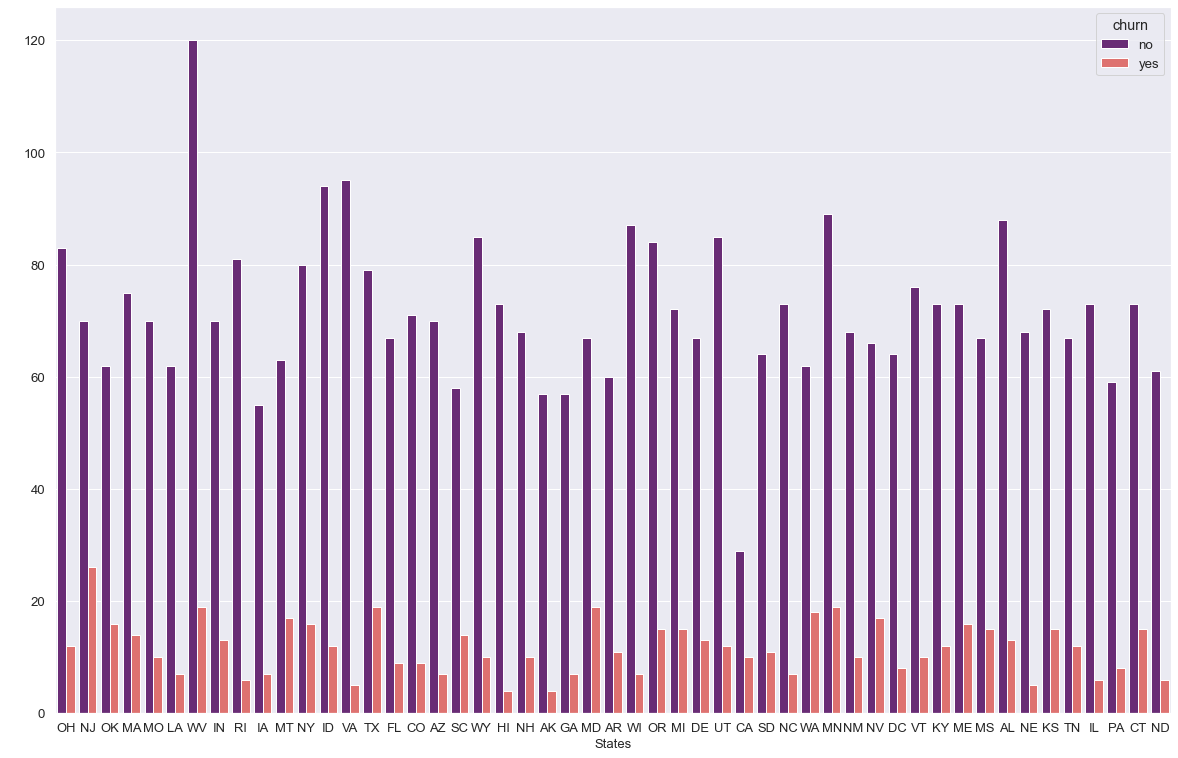

In [22]:
# BAR-CHART

plt.figure(figsize=(20,13))
sns.set(font_scale=1.2)
ax = sns.countplot(x='state', hue= 'churn', data = train, palette='magma')
sns.set(font_scale=1.1)
plt.xlabel("States",fontsize=13)
plt.ylabel(" ",fontsize=13)
plt.xticks(rotation=0,fontsize=13)
plt.show()

In [23]:
train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls', 'churn'],
      dtype='object')

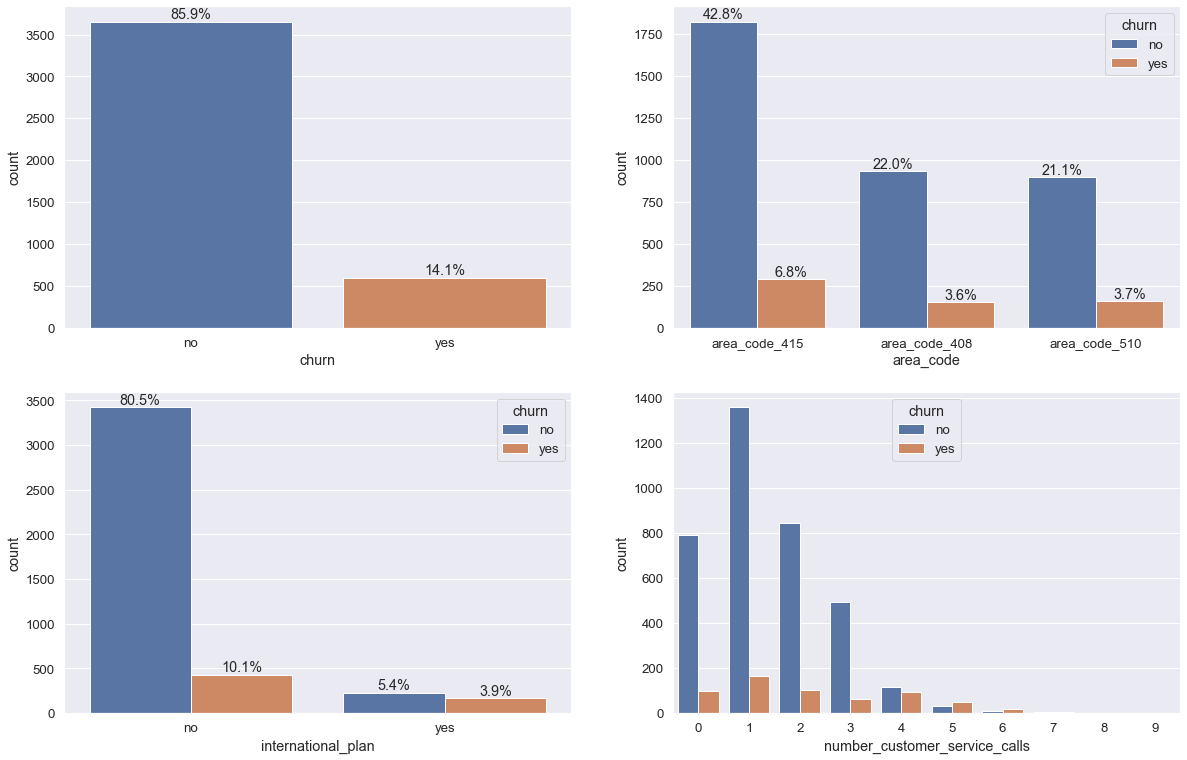

In [24]:
# We first review the 'Status' relation with categorical variables
sns.set(font_scale=1.2)
fig, axarr = plt.subplots(2, 2, figsize=(20, 13))
ax = sns.countplot(x = 'churn',data = train, ax=axarr[0][0]) 
for c in ax.containers:
    labels = [f'{h/train.churn.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c,labels=labels, label_type='edge')
ax = sns.countplot(x='area_code', hue = 'churn',data = train, ax=axarr[0][1])
for c in ax.containers:
    labels = [f'{h/train.area_code.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c,labels=labels, label_type='edge')
ax = sns.countplot(x='international_plan', hue = 'churn',data = train, ax=axarr[1][0])
for c in ax.containers:
    labels = [f'{h/train.international_plan.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c,labels=labels, label_type='edge')
sns.countplot(x='number_customer_service_calls', hue = 'churn',data = train, ax=axarr[1][1])
plt.show()


In [25]:
# Observations;

# The first chart above vividly illustrates the imbalanced in our target variable class. 

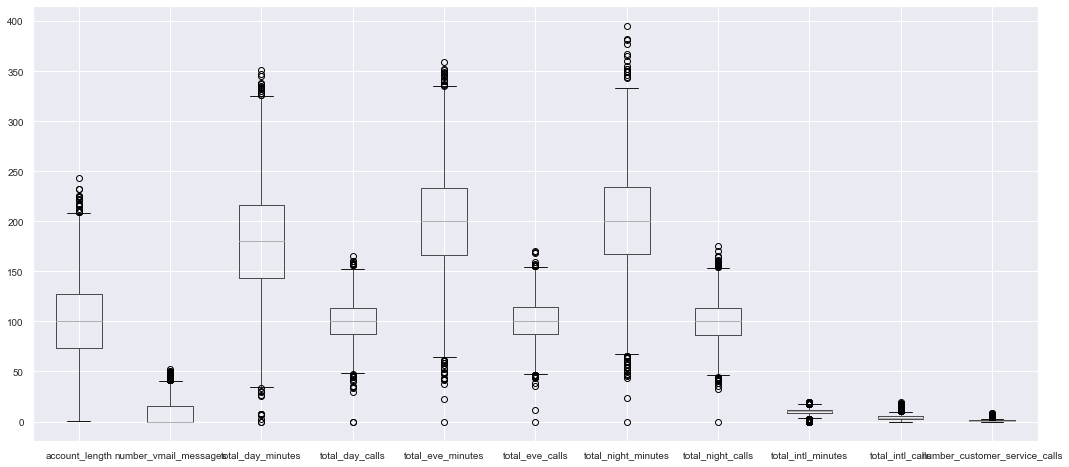

In [26]:
# BOX PLOT 
sns.set(font_scale=1.5)
plt.figure(figsize=(18,8))
sns.set(font_scale=0.9)
train.boxplot()
plt.show()

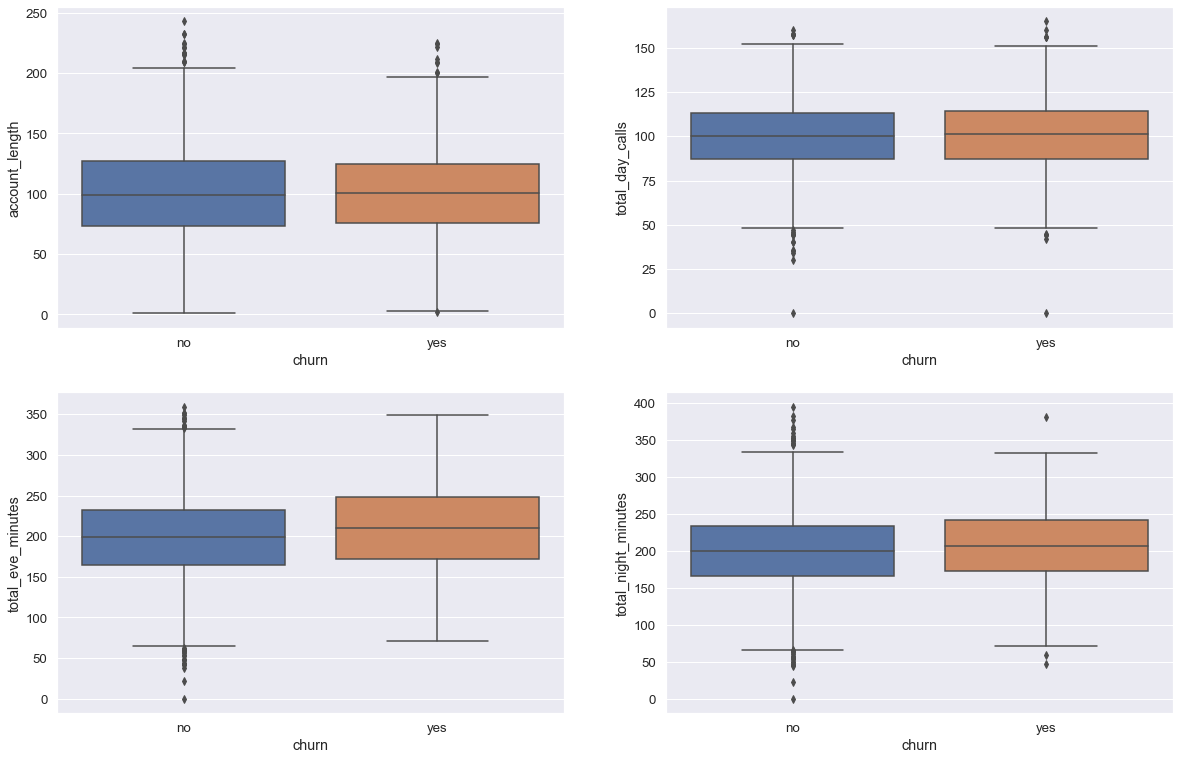

In [27]:

# BOX-POT with relation to Churn variable
sns.set(font_scale=1.2)
fig, axarr = plt.subplots(2, 2, figsize=(20, 13))
sns.boxplot(x = 'churn', y = 'account_length', data = train, ax=axarr[0][0])
sns.boxplot(x = 'churn', y = 'total_day_calls', data = train, ax=axarr[0][1])
sns.boxplot(x = 'churn', y = 'total_eve_minutes', data = train, ax=axarr[1][0])
sns.boxplot(x = 'churn', y = 'total_night_minutes', data = train, ax=axarr[1][1])
plt.show()


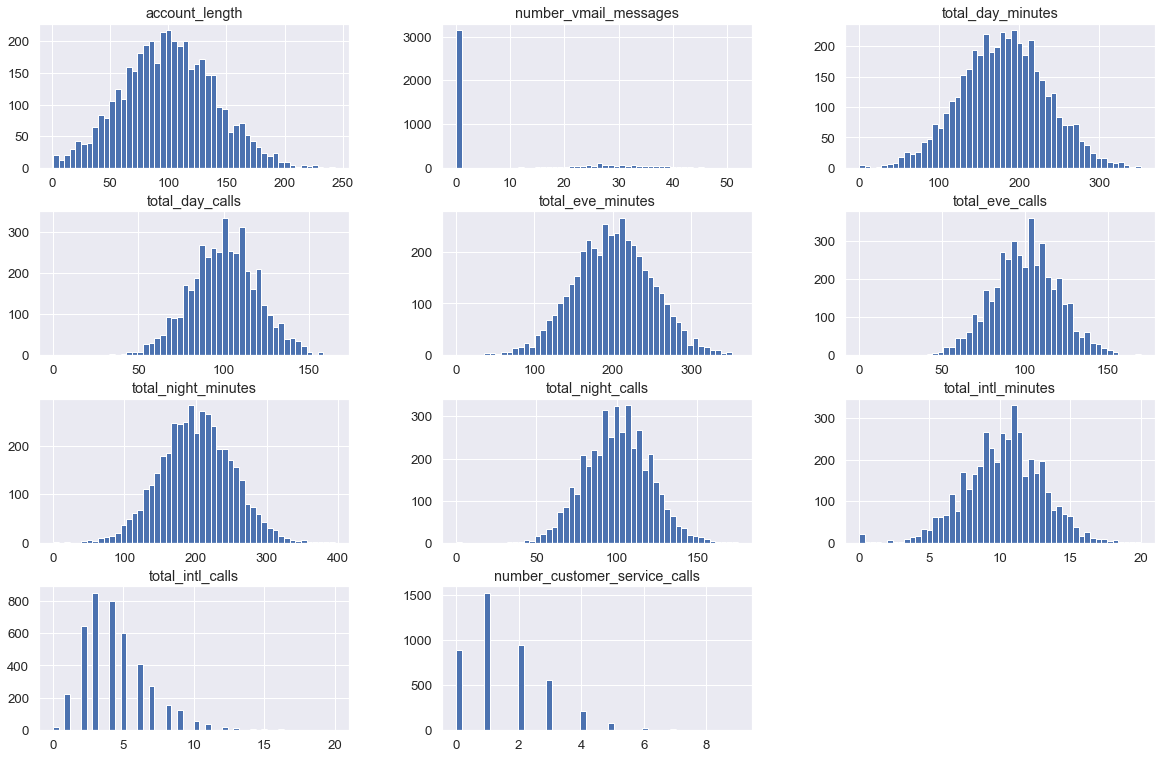

In [28]:
# HISTOGRAMS

sns.set(font_scale=1.2)
hist = train.hist(figsize=(20,13), bins=50);

plt.show()


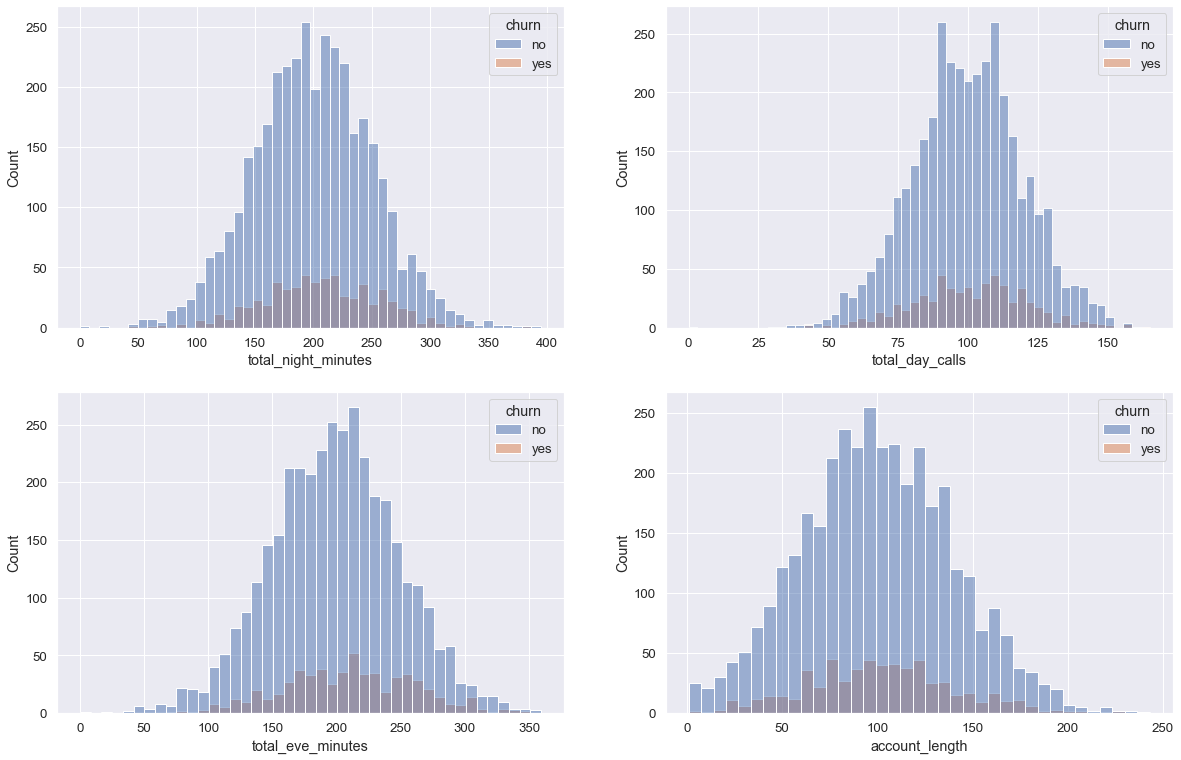

In [29]:
sns.set(font_scale=1.2)
fig, axarr = plt.subplots(2, 2, figsize=(20, 13))
sns.histplot(data = train, x = "total_night_minutes",  hue = "churn",ax=axarr[0][0])
sns.histplot(data = train, x = "total_day_calls", hue = "churn",ax=axarr[0][1])
sns.histplot(data = train, x = "total_eve_minutes",  hue = "churn",ax=axarr[1][0])
sns.histplot(data = train, x = "account_length", hue = "churn",ax=axarr[1][1])
plt.show()

In [30]:
train.drop('state', axis=1, inplace=True)

In [31]:
                                
    
                                            # MULTIVARIATE VISUALIZATION
       
    

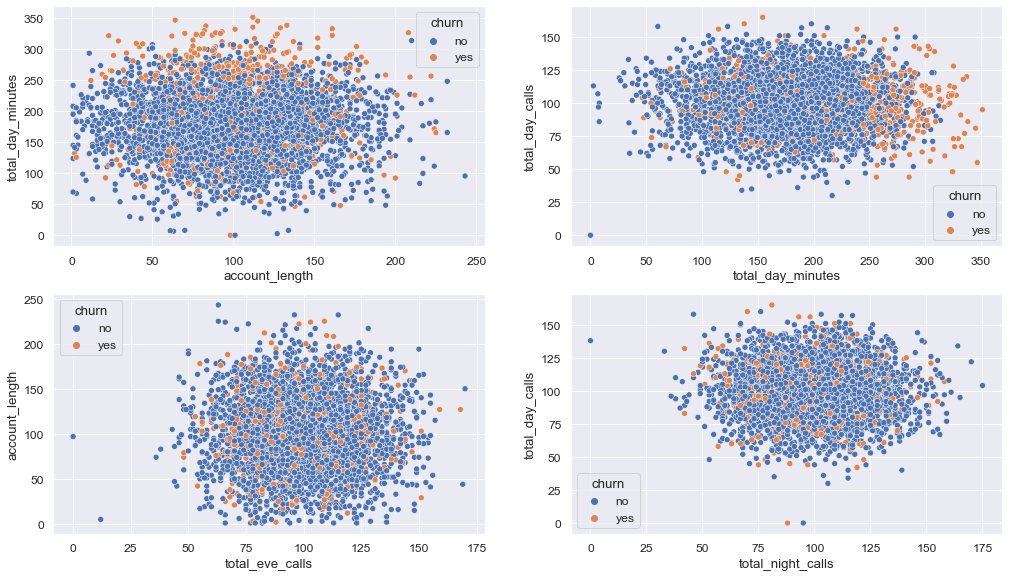

In [32]:
# SCATTER PLOT

sns.set(font_scale=1.1)
plt.figure(figsize=(17,15))
plt.subplot(3,2,1)
sns.scatterplot(data =train,x="account_length",y='total_day_minutes', hue="churn")
plt.subplot(3,2,2)
sns.scatterplot(data =train,x="total_day_minutes",y='total_day_calls', hue="churn")
plt.subplot(3,2,3)
sns.scatterplot(data =train,x="total_eve_calls",y='account_length', hue="churn")
plt.subplot(3,2,4)
sns.scatterplot(data =train,x="total_night_calls",y='total_day_calls', hue="churn")

plt.show()


In [33]:

                                                    # LABEL ENCODING


In [34]:
# Convert voice_mail_plan, international_plan to binary e.g. yes = 1 and no = 0:
train['area_code'] = train['area_code'].map({'area_code_415':1, 'area_code_510':2, 'area_code_408':3})
train['international_plan'] = train['international_plan'].map({'yes':1, 'no':0})
train['voice_mail_plan'] = train['voice_mail_plan'].map({'yes':1, 'no':0}) 
# convert binary to numerical values
train['churn'] = train['churn'].map({'yes': 1, 'no': 0})

# Convert voice_mail_plan, international_plan to binary e.g. yes = 1 and no = 0:
test['area_code'] = test['area_code'].map({'area_code_415':1, 'area_code_510':2, 'area_code_408':3})
test['international_plan'] = test['international_plan'].map({'yes':1, 'no':0})
test['voice_mail_plan'] = test['voice_mail_plan'].map({'yes':1, 'no':0}) 



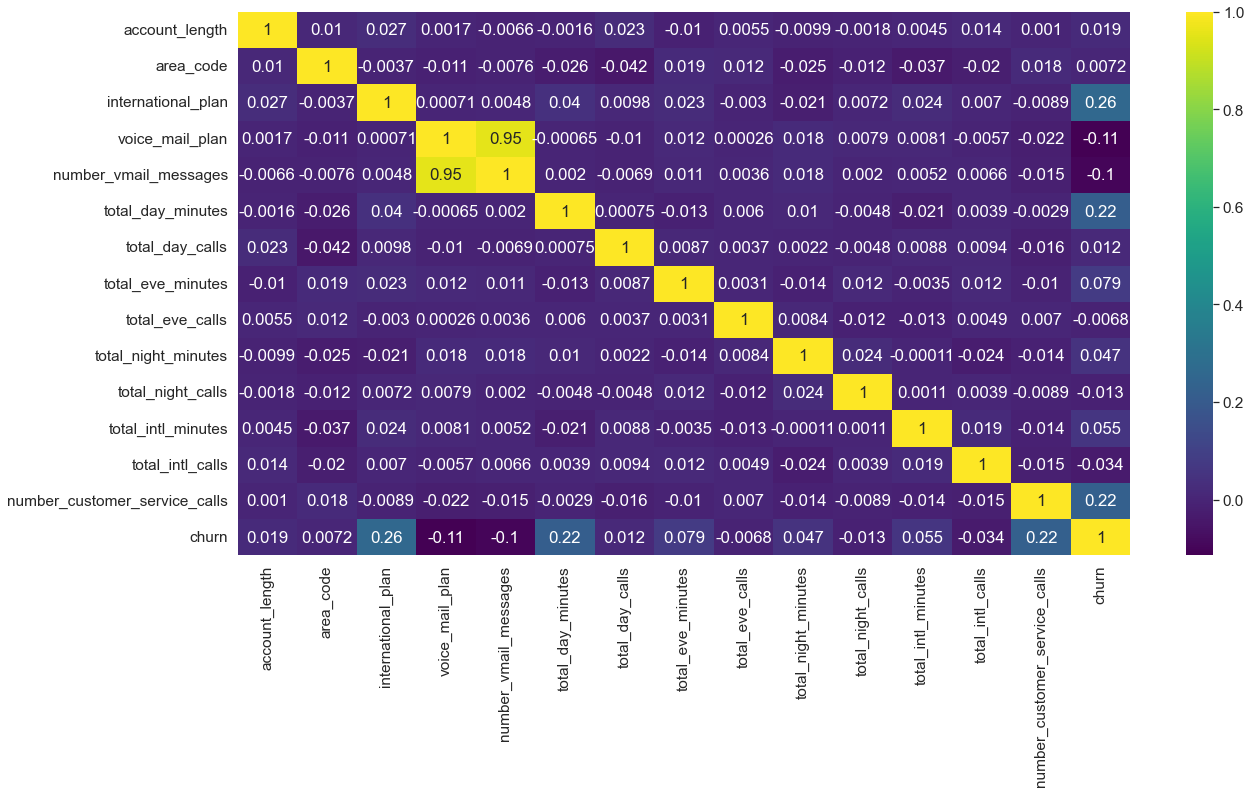

In [35]:
# HEATMAP 

sns.set(font_scale=1.4)
plt.figure(figsize=(20,10))
corr = train.corr()
sns.heatmap(corr, cmap='viridis',annot=True)
plt.show()


In [36]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95 exclude it in the model
high_corr = [column for column in upper.columns if any(upper[column] > 0.95)]
print(high_corr)

['number_vmail_messages']


In [37]:
 
                                                    # CREATE MODELS



In [38]:
# SEPERATE FEATURE VARIABLES FROM TARGET VARIABLE - #train dataset#

In [39]:
X = train.drop(['churn','number_vmail_messages'],axis=1)
y = train['churn']

In [40]:
                                        # HANDLING IMBALANCED DATA WITH SMOTE
    
    

from imblearn.over_sampling import SMOTE

X_res, y_res = SMOTE().fit_resample(X,y)

y_res.value_counts()

0    3652
1    3652
Name: churn, dtype: int64

In [41]:
# Split to training and testing in the ratio of 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,test_size=0.2,random_state=42)

In [42]:
# Preprocessing – Scaling the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:

                                        # MODEL-1: LOGISTIC REGRESSION MODEL


In [44]:
# IMPORTING MODULES FROM SKLEARN PACKAGES

from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
# Initialize the model
model_lg = LogisticRegression()

# Fit model on training data
model_lg = model_lg.fit(X_train, y_train)

# Predict the model
y_pred_lg = model_lg.predict(X_test)


In [47]:
                                        
                                            
                                        # MODEL-1: EVALUATION

# Model accuracy
print("\n LOGISTIC REGRESSION MODEL ACCURACY:",metrics.accuracy_score(y_test, y_pred_lg)*100,"%")

# Classification Report
print("\n CLASSIFICATION REPORT:\n\n",classification_report(y_test,y_pred_lg, labels=[0,1]))

# Confusion Matrix
print("CONFUSION MATRIX:\n\n",confusion_matrix(y_test,y_pred_lg))


 LOGISTIC REGRESSION MODEL ACCURACY: 76.18069815195072 %

 CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.80      0.72      0.76       758
           1       0.73      0.81      0.77       703

    accuracy                           0.76      1461
   macro avg       0.76      0.76      0.76      1461
weighted avg       0.77      0.76      0.76      1461

CONFUSION MATRIX:

 [[544 214]
 [134 569]]


In [48]:
                                         
                                        # MODEL-2: SUPPORT VECTOR MACHINE - SVM
        

In [49]:
from sklearn.svm import SVC

In [50]:
# Initialize the model
model_svm = SVC(kernel = 'linear', random_state = 0)

# Fit model on training data
model_svm = model_svm.fit(X_train, y_train)

# Predict the model
y_pred_svm = model_svm.predict(X_test)


In [51]:
                                            # MODEL-2: EVALUATION

# Model accuracy
print("\nSVM MODEL ACCURACY:",metrics.accuracy_score(y_test, y_pred_svm)*100,"%")

# Classification Report
print("\n CLASSIFICATION REPORT:\n\n",classification_report(y_test,y_pred_svm, labels=[0,1]))

# Confusion Matrix
print("CONFUSION MATRIX:\n\n",confusion_matrix(y_test,y_pred_svm))


SVM MODEL ACCURACY: 76.18069815195072 %

 CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.81      0.70      0.75       758
           1       0.72      0.82      0.77       703

    accuracy                           0.76      1461
   macro avg       0.77      0.76      0.76      1461
weighted avg       0.77      0.76      0.76      1461

CONFUSION MATRIX:

 [[534 224]
 [124 579]]


In [52]:
                                         
                                         # MODEL-3: DECISION TREE CLASSIFIER                                                                                         
        

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
# Create a classifier object
model_dt = DecisionTreeClassifier()

# Fit model on training data
model_dt = model_dt.fit(X_train, y_train)

# Predict the model
y_pred_dt = model_dt.predict(X_test)


In [55]:
                                        
                                            
                                        # MODEL-3: EVALUATION

# Model accuracy
print("\n DECISION TREE MODEL ACCURACY:",metrics.accuracy_score(y_test, y_pred_dt)*100,"%")

# Classification Report
print("\n CLASSIFICATION REPORT:\n\n",classification_report(y_test,y_pred_dt, labels=[0,1]))

# Confusion Matrix
print("CONFUSION MATRIX:\n\n",confusion_matrix(y_test,y_pred_dt))


 DECISION TREE MODEL ACCURACY: 85.96851471594799 %

 CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.88      0.84      0.86       758
           1       0.84      0.88      0.86       703

    accuracy                           0.86      1461
   macro avg       0.86      0.86      0.86      1461
weighted avg       0.86      0.86      0.86      1461

CONFUSION MATRIX:

 [[638 120]
 [ 85 618]]


In [56]:
# Comment:
# Model is properly created by the look of minority class which is 1 = churn, with high precission and recall accuracy.
# Imbalance dataset, 

In [57]:

                                        # MODEL-4: RANDOM FOREST CLASSIFIER 


In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
# Create a classifier object
model_rf = RandomForestClassifier()

# Fit model on training data
model_rf = model_rf.fit(X_train, y_train)

# Predict the model
y_pred_rf = model_rf.predict(X_test)


In [60]:
                                        
                                            
                                        # MODEL-4: EVALUATION

# Model accuracy
print("\n RANDOM FOREST CLASSIFIER MODEL ACCURACY:",metrics.accuracy_score(y_test, y_pred_rf)*100,"%")

# Classification Report
print("\n CLASSIFICATION REPORT:\n\n",classification_report(y_test,y_pred_rf, labels=[0,1]))

# Confusion Matrix
print("CONFUSION MATRIX:\n\n",confusion_matrix(y_test,y_pred_rf))


 RANDOM FOREST CLASSIFIER MODEL ACCURACY: 93.90828199863107 %

 CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.93      0.96      0.94       758
           1       0.96      0.92      0.94       703

    accuracy                           0.94      1461
   macro avg       0.94      0.94      0.94      1461
weighted avg       0.94      0.94      0.94      1461

CONFUSION MATRIX:

 [[728  30]
 [ 59 644]]


In [61]:

                                     # MODEL-5: K-NEAREST NEIGHBOR -KNN


In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
# Creating knn object
model_knn = KNeighborsClassifier(n_neighbors=1)

# Fit model on training data
model_knn = model_knn.fit(X_train, y_train)

# Predict the model
y_pred_knn = model_knn.predict(X_test)


In [64]:
                                        
                                            
                                        # MODEL-5: EVALUATION

# Model accuracy
print("\n K-NEAREST NEIGHBOR MODEL ACCURACY:",metrics.accuracy_score(y_test, y_pred_knn)*100,"%")

# Classification Report
print("\n CLASSIFICATION REPORT:\n\n",classification_report(y_test,y_pred_knn, labels=[0,1]))

# Confusion Matrix
print("CONFUSION MATRIX:\n\n",confusion_matrix(y_test,y_pred_knn))


 K-NEAREST NEIGHBOR MODEL ACCURACY: 87.13210130047912 %

 CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.96      0.78      0.86       758
           1       0.81      0.96      0.88       703

    accuracy                           0.87      1461
   macro avg       0.88      0.87      0.87      1461
weighted avg       0.89      0.87      0.87      1461

CONFUSION MATRIX:

 [[595 163]
 [ 25 678]]


In [65]:

                                     # MODEL-6: GRADIENT BOOSTING CLASSIFIER

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
# Creating knn object
model_gbc = GradientBoostingClassifier()
# Fit model on training data
model_gbc = model_gbc.fit(X_train, y_train)
# Predict the model
y_pred_gbc = model_gbc.predict(X_test)

In [68]:
 
                                            
                                        # MODEL-6: EVALUATION

# Model accuracy
print("\n GRADIENT BOOSTING CLASSIFIER ACCURACY:",metrics.accuracy_score(y_test, y_pred_gbc)*100,"%")

# Classification Report
print("\n CLASSIFICATION REPORT:\n\n",classification_report(y_test,y_pred_gbc, labels=[0,1]))

# Confusion Matrix
print("CONFUSION MATRIX:\n\n",confusion_matrix(y_test,y_pred_gbc))


 GRADIENT BOOSTING CLASSIFIER ACCURACY: 85.83162217659137 %

 CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.84      0.91      0.87       758
           1       0.89      0.81      0.85       703

    accuracy                           0.86      1461
   macro avg       0.86      0.86      0.86      1461
weighted avg       0.86      0.86      0.86      1461

CONFUSION MATRIX:

 [[686  72]
 [135 568]]


In [69]:


                                            # MODELS EVALUATION SUMMARY
                                            #Classification Algorithms#
        
        

In [70]:
# SUMMARY FOR MODEL EVALUATION:
Matrix = {'MODELS': ['Logistic Regression', 'Support Vector Machine', 
                    'Decision Tree Classifier','Random Forest Classifier', 
                    'K-Nearest Neighbors','Gradient Boosting Classifier'],
           'PRECISION':[
               metrics.precision_score(y_test, y_pred_lg)*100,
               metrics.precision_score(y_test, y_pred_svm)*100,
               metrics.precision_score(y_test, y_pred_dt)*100,
               metrics.precision_score(y_test, y_pred_rf)*100,
               metrics.precision_score(y_test, y_pred_knn)*100,
               metrics.precision_score(y_test, y_pred_gbc)*100], 
           'RECALL': [
               metrics.recall_score(y_test, y_pred_lg)*100,
               metrics.recall_score(y_test, y_pred_svm)*100,
               metrics.recall_score(y_test, y_pred_dt)*100,
               metrics.recall_score(y_test, y_pred_rf)*100,
               metrics.recall_score(y_test, y_pred_knn)*100,
               metrics.recall_score(y_test, y_pred_gbc)*100], 
           'F1-SCORE': [
               metrics.f1_score(y_test, y_pred_lg)*100,
               metrics.f1_score(y_test, y_pred_svm)*100,
               metrics.f1_score(y_test, y_pred_dt)*100,
               metrics.f1_score(y_test, y_pred_rf)*100,
               metrics.f1_score(y_test, y_pred_knn)*100, 
               metrics.f1_score(y_test, y_pred_gbc)*100],
            'ACCURACY': [
               metrics.accuracy_score(y_test, y_pred_lg)*100,
               metrics.accuracy_score(y_test, y_pred_svm)*100,
               metrics.accuracy_score(y_test, y_pred_dt)*100,
               metrics.accuracy_score(y_test, y_pred_rf)*100,
               metrics.accuracy_score(y_test, y_pred_knn)*100,
               metrics.accuracy_score(y_test, y_pred_gbc)*100]}

Table = pd.DataFrame(Matrix)
# PRINT SUMMARY TABLE - in Percentage rounded to 1 decimal
Table = Table.round(1)
Table

,MODELS,PRECISION,RECALL,F1-SCORE,ACCURACY
0,Logistic Regression,72.7,80.9,76.6,76.2
1,Support Vector Machine,72.1,82.4,76.9,76.2
2,Decision Tree Classifier,83.7,87.9,85.8,86.0
3,Random Forest Classifier,95.5,91.6,93.5,93.9
4,K-Nearest Neighbors,80.6,96.4,87.8,87.1
5,Gradient Boosting Classifier,88.8,80.8,84.6,85.8


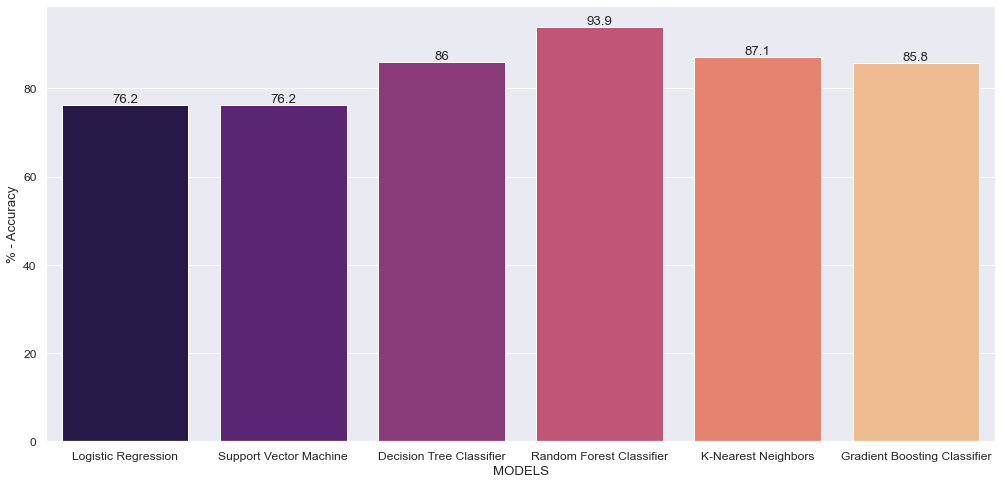

In [71]:
# VISUALIZE OUR MODELS ACCURACY

plt.figure(figsize=(17,8))
sns.set(font_scale=1.1)
ax = sns.barplot(x='MODELS',y='ACCURACY', data=Table, palette='magma')
for i in ax.containers:
    ax.bar_label(i,)
    plt.ylabel("% - Accuracy")
    
plt.show()

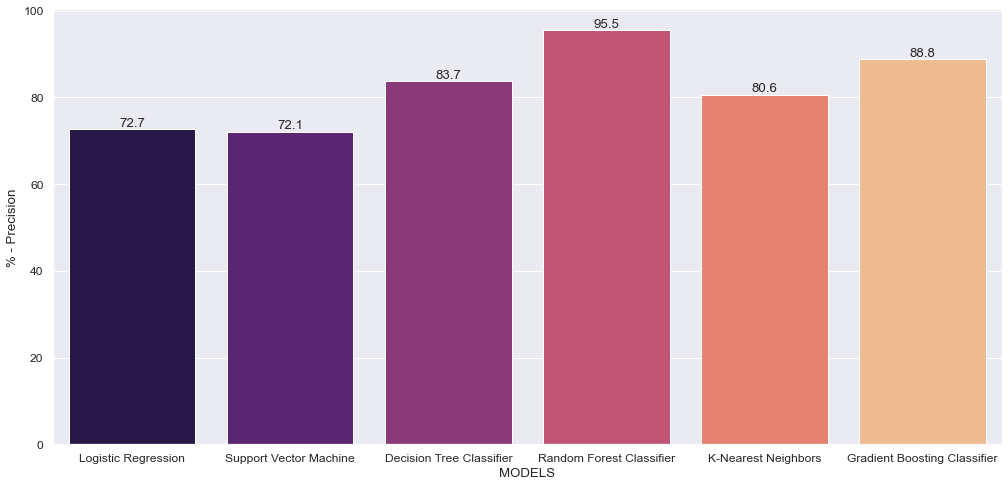

In [72]:
# VISUALIZE OUR MODELS - PRECISION
plt.figure(figsize=(17,8))
sns.set(font_scale=1.1)
ax = sns.barplot(x='MODELS',y='PRECISION', data=Table,palette='magma')
for i in ax.containers:
    ax.bar_label(i,)
    plt.ylabel("% - Precision")
plt.show()

In [73]:
# Comment:
# Best model to use for the production is Random Forest Classifier

In [74]:


                                                # SAVE MODEL



In [75]:
# Perform feature scalling on SMOTE X_res.
X_res = scaler.fit_transform(X_res)

In [76]:
# Train the best model on entier dataset - RFC

model_rf.fit(X_res,y_res)


RandomForestClassifier()

In [77]:
# Save the Model using Pickle

import pickle 

pickle_out = open("churn_pred_2022.pkl", mode = "wb") 
pickle.dump(model_rf, pickle_out) 

In [78]:
# load the model from disk
model_rf = pickle.load(open('churn_pred_2022.pkl', 'rb'))

In [79]:
# load saved model
with open('churn_pred_2022.pkl' , 'rb') as rf:
    model = pickle.load(rf)

In [80]:
test.head()

,id,account_length,area_code,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
0,1,128,1,0,1,265.1,110,197.4,99,244.7,91,10.0,3,1
1,2,118,2,1,0,223.4,98,220.6,101,203.9,118,6.3,6,0
2,3,62,1,0,0,120.7,70,307.2,76,203.0,99,13.1,6,4
3,4,93,2,0,0,190.7,114,218.2,111,129.6,121,8.1,3,3
4,5,174,1,0,0,124.3,76,277.1,112,250.7,115,15.5,5,3


In [81]:
X_tt = test
X_tt = X_tt.drop('id', axis=1)

In [82]:
# Apply features scalling
X_tt = scaler.transform(X_tt)

In [83]:
# Use the best model to predict on test dataset provided
churn_pred = model.predict(X_tt)
print(churn_pred[:20])

[0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]


In [84]:
# Save the predicted values in CSV file
ansRF = pd.read_csv('test.csv')
ansRF.churn_prediction = churn_pred
ansRF.churn_prediction= ansRF.churn_prediction.map({ 1: 'yes', 0 : 'no'}) 
ansRF.to_csv('new_test.csv', index=False)
ansRF.head()


,id,churn_prediction,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,no,KS,128,area_code_415,no,yes,25,265.1,110,...,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,no,AL,118,area_code_510,yes,no,0,223.4,98,...,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,yes,IA,62,area_code_415,no,no,0,120.7,70,...,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,no,VT,93,area_code_510,no,no,0,190.7,114,...,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,no,NE,174,area_code_415,no,no,0,124.3,76,...,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [85]:
+

SyntaxError: invalid syntax (15193383.py, line 1)